In [63]:
import cudasift as cs
import numpy as np
from scipy.misc import bytescale
from plio.io import io_gdal

%pylab inline
figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


# Instantiate the GPU(s)

In [2]:
cs.PyInitCuda()

# Instantiate a data object to old the SIFT points

In [72]:
d = io_gdal.GeoDataset('/data/Apollo15_Metric/REV16/AS15-M-0295_sub4.cub')
arr = d.read_array()
npts = max(arr.shape) / 1.8
sd = cs.PySiftData(npts)

cs.ExtractKeypoints(arr, sd)

kp, des = sd.to_data_frame()
kp = kp[['xpos', 'ypos', 'scale', 'sharpness', 'edgeness', 'orientation', 'score', 'ambiguity']]
kp['score'] = 0.0
kp['ambiguity'] = 0.0

"""imshow(bytescale(arr), cmap='Greys')
plot(kp['xpos'], kp['ypos'], 'ro')
show()
kp[['xpos', 'ypos']].describe()"""

sd2 = cs.PySiftData(npts)
d = io_gdal.GeoDataset('/data/Apollo15_Metric/REV16/AS15-M-0296_sub4.cub')
arr2 = d.read_array()
cs.ExtractKeypoints(arr2, sd2)

kp2, des2 = sd2.to_data_frame()
kp2 = kp2[['xpos', 'ypos', 'scale', 'sharpness', 'edgeness', 'orientation', 'score', 'ambiguity']]
kp2['score'] = 0.0
kp2['ambiguity'] = 0.0

"""imshow(bytescale(arr2), cmap='Greys')
plot(kp2['xpos'], kp2['ypos'], 'ro')"""

"imshow(bytescale(arr2), cmap='Greys')\nplot(kp2['xpos'], kp2['ypos'], 'ro')"

In [73]:
sd = None
sd2 = None

In [74]:
sd = cs.PySiftData.from_data_frame(kp, des)
sd2 = cs.PySiftData.from_data_frame(kp2, des2)

In [75]:
# Apply the matcher and get the matches back
cs.PyMatchSiftData(sd, sd2)

In [77]:
k, d = sd.to_data_frame()
k

,xpos,ypos,scale,sharpness,edgeness,orientation,score,ambiguity,match,match_xpos,match_ypos,match_error,subsampling
0,4233.823242,31.686890,18.849100,-162.277084,4.523734,102.685005,0.767084,0.994119,497,3918.338623,873.766602,0.0,0.0
1,3072.182861,31.262947,22.427183,-193.388550,5.015637,218.430267,0.834118,0.932845,367,368.468994,722.524902,0.0,0.0
2,1166.877319,127.518661,18.270113,-271.686462,4.247793,179.776001,0.876159,0.962614,2550,14.080566,4832.938477,0.0,0.0
3,2835.676758,25.648743,22.513117,-1690.249390,4.654724,180.534302,0.921374,0.855543,23,2838.813477,27.833618,0.0,0.0
4,1741.101807,137.621826,17.362770,882.966980,5.603604,33.203941,0.983931,0.879649,51,2956.850830,124.447517,0.0,0.0
5,3678.215332,29.239624,22.498983,-711.931335,4.244420,318.761566,0.971728,0.857582,45,4897.685547,44.462887,0.0,0.0
6,1441.279297,142.370193,18.704914,136.124969,4.556818,282.294403,0.811375,0.964995,209,607.852112,341.706818,0.0,0.0
7,3161.373535,73.309380,25.039122,427.996399,5.895685,45.784466,0.830426,0.975051,590,127.364151,1197.822144,0.0,0.0
8,5316.924316,16.209417,16.652327,-144.719437,4.247747,88.528862,0.770897,0.947050,1896,1852.838501,3650.091797,0.0,0.0
9,1487.903931,47.322483,19.883825,-339.044769,4.923161,164.819611,0.803902,0.998468,1356,1792.482910,2682.134766,0.0,0.0


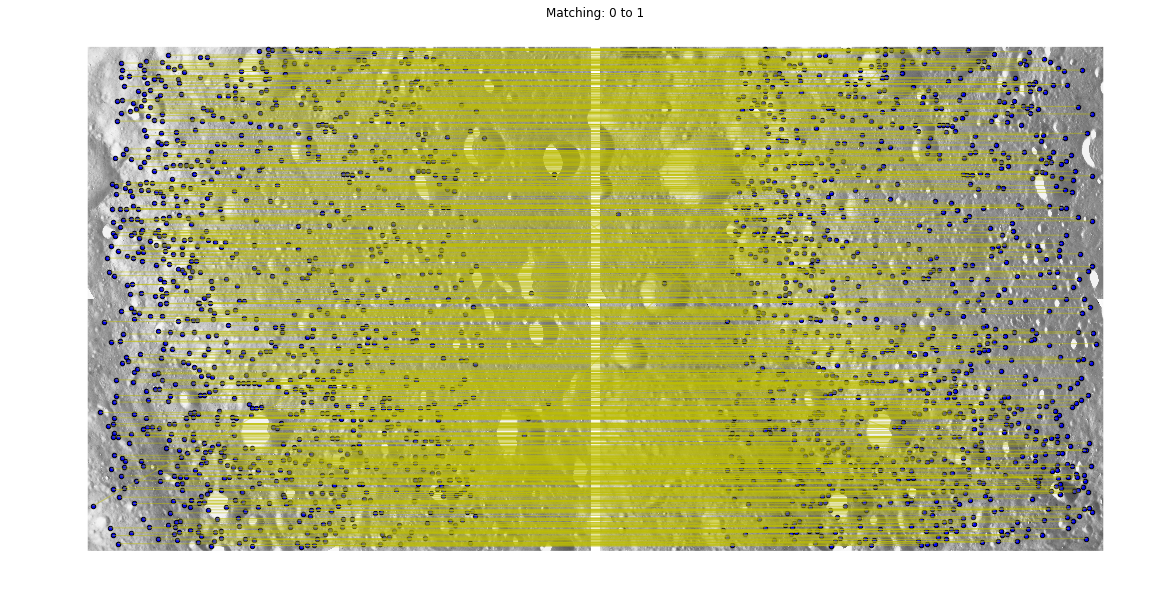

In [68]:
image_space=100
image_kwargs = {}
ax = plt.gca()

# Plot setup
ax.set_title('Matching: {} to {}'.format(0, 1))
ax.margins(tight=True)
ax.axis('off')

# Image plotting
source_array = bytescale(arr)
destination_array = bytescale(arr2)

s_shape = arr.shape
d_shape = arr.shape

y = max(s_shape[0], d_shape[0])
x = s_shape[1] + d_shape[1] + image_space
composite = np.zeros((y, x))

composite[0: s_shape[0], :s_shape[1]] = source_array
composite[0: d_shape[0], s_shape[1] + image_space:] = destination_array

if 'cmap' in image_kwargs:
    image_cmap = image_kwargs['cmap']
else:
    image_cmap = 'Greys'

k = kp1[kp1['ambiguity'] <= 0.9]

ax.scatter(k['xpos'], k['ypos'])
x_offset = s_shape[1] + image_space
newx = k['match_xpos'] + x_offset
ax.scatter(newx, k['match_ypos'])


"""matches, mask = edge.clean(clean_keys)

source_keypoints = edge.source.get_keypoints(index=matches['source_idx'])
destination_keypoints = edge.destination.get_keypoints(index=matches['destination_idx'])

# Plot the source
source_idx = matches['source_idx'].values
s_kps = source_keypoints.loc[source_idx]
ax.scatter(s_kps['x'], s_kps['y'], **scatter_kwargs)

# Plot the destination
destination_idx = matches['destination_idx'].values
d_kps = destination_keypoints.loc[destination_idx]
x_offset = s_shape[1] + image_space
newx = d_kps['x'] + x_offset
ax.scatter(newx, d_kps['y'], **scatter_kwargs)"""

ax.imshow(composite, cmap=image_cmap)

# Draw the connecting lines
color = 'y'

s_kps = k[['xpos', 'ypos']].values
d_kps = k[['match_xpos', 'match_ypos']].values
d_kps[:, 0] += x_offset

for l in zip(s_kps, d_kps):
    ax.plot((l[0][0], l[1][0]), (l[0][1], l[1][1]), color=color, alpha=0.5)

show()

# Extract the keypoints

In [48]:
cs.ExtractKeypoints(arr, sd)

In [49]:
len(sd)

1024

In [50]:
keypoints, descriptors = sd.to_data_frame()
print(keypoints)

             xpos         ypos      scale  sharpness  edgeness  orientation  \
0      141.259338   161.770554  15.976645  -8.678956  5.639627    95.220863   
1       44.415749   160.653320  16.598124  -8.256252  4.463142   302.693176   
2      259.470764   918.221375  15.848709 -14.220888  4.260312   353.253601   
3      816.051575   202.257065  19.174238   5.398941  6.171534   178.082367   
4      306.587891   928.349121  16.725969   8.256517  6.262336   172.185867   
5      403.656158    60.665298  22.139879   5.409713  4.873366   177.240753   
6      385.338196   778.368591  15.537798   8.300902  7.435558   178.576370   
7      336.773285   772.681396  21.552376 -14.315967  4.698773   171.385132   
8      299.078552   823.361511  15.799794   5.838296  8.330600   322.190216   
9      844.835999   774.773987  17.186592 -14.227888  7.287588   178.719391   
10     894.626770   770.829956  17.384029   7.043828  6.207763   171.813019   
11     933.247559   225.503799  16.987896 -16.726185

In [51]:
print(descriptors.shape)

(1024, 128)


# Pull a second image and try matching!

Here


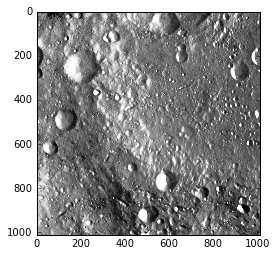

In [52]:
sd2 = cs.PySiftData()
d = io_gdal.GeoDataset('/data/autocnet/autocnet/examples/Apollo15/AS15-M-0296_SML.png')
arr2 = d.read_array()
imshow(arr2, cmap='Greys')

cs.ExtractKeypoints(arr2, sd2)
keypoints2, descriptors2 = data.to_data_frame()

In [53]:
cs.PyMatchSiftData(sd, sd2)

In [54]:
keypoints, descriptors = sd.to_data_frame()

In [55]:
keypoints

,xpos,ypos,scale,sharpness,edgeness,orientation,score,ambiguity,match,match_xpos,match_ypos,match_error,subsampling
0,141.259338,161.770554,15.976645,-8.678956,5.639627,95.220863,0.862203,0.988963,393,815.977722,803.136597,0.000000,16.0
1,44.415749,160.653320,16.598124,-8.256252,4.463142,302.693176,0.849377,0.934975,32,11.748733,144.367050,0.007491,16.0
2,259.470764,918.221375,15.848709,-14.220888,4.260312,353.253601,0.921511,0.978699,900,779.478882,443.783142,0.000000,16.0
3,816.051575,202.257065,19.174238,5.398941,6.171534,178.082367,0.883877,0.996138,771,787.283447,320.540161,0.090977,16.0
4,306.587891,928.349121,16.725969,8.256517,6.262336,172.185867,0.935398,0.966841,6,527.987488,917.709839,0.009171,16.0
5,403.656158,60.665298,22.139879,5.409713,4.873366,177.240753,0.788548,0.997416,347,12.772862,763.726990,0.002741,16.0
6,385.338196,778.368591,15.537798,8.300902,7.435558,178.576370,0.964496,0.974612,1,611.724976,766.696838,0.000000,16.0
7,336.773285,772.681396,21.552376,-14.315967,4.698773,171.385132,0.985591,0.911635,4,560.760864,771.618591,0.000044,16.0
8,299.078552,823.361511,15.799794,5.838296,8.330600,322.190216,0.948808,0.869627,2,528.972900,815.585022,0.006605,16.0
9,844.835999,774.773987,17.186592,-14.227888,7.287588,178.719391,0.936040,0.984683,764,780.055542,321.625366,0.085529,16.0
